#### CSCA 5632 Unsupervised Algorithms in Machine Learning

# Final project: Coffee Quality Prediction
***

### Project Summary
This project aims to build a predictive model for estimating the total cup points, a comprehensive metric of coffee quality, based on influencing factors. This is the final assignment for the CSCA 5632 course.

We will conduct data cleaning and Exploratory Data Analysis (EDA) to inspect, visualize, and cleanse the data. The project will employ an unsupervised approach(K means clustering) to discover structures or patterns within the data without relying on predefined labels, thereby understanding the underlying segmentation. Lastly, we will use a supervised approach to predict the 'Total Cup Points' for the dataset.

### Data Source

The data is sourced from the [Coffee Quality Data (CQI May-2023)](https://www.kaggle.com/datasets/fatihb/coffee-quality-data-cqi?select=df_arabica_clean.csv)

It includes one CSV file (df_arabica_clean), which is publicly accessible. The file size is 115 KB and contains 41 columns and 208 rows in total.

## Data Cleaning

In [1]:
import pandas as pd
from dateutil import parser
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("data/df_arabica_clean.csv")

In [3]:
df.head()

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             207 non-null    int64  
 1   ID                     207 non-null    int64  
 2   Country of Origin      207 non-null    object 
 3   Farm Name              205 non-null    object 
 4   Lot Number             206 non-null    object 
 5   Mill                   204 non-null    object 
 6   ICO Number             75 non-null     object 
 7   Company                207 non-null    object 
 8   Altitude               206 non-null    object 
 9   Region                 205 non-null    object 
 10  Producer               206 non-null    object 
 11  Number of Bags         207 non-null    int64  
 12  Bag Weight             207 non-null    object 
 13  In-Country Partner     207 non-null    object 
 14  Harvest Year           207 non-null    object 
 15  Gradin

After reviewing the basic characteristics of the dataset, let's begin by checking for duplicate rows.

In [5]:
# Check and handle duplicates
duplicated = df[df.duplicated()]
print("Number of duplicated rows: ", duplicated.shape[0])

Number of duplicated rows:  0


We confirmed that there are no duplicate rows; next, we will check the missing ratio in the data. Since we plan to drop some unrelated columns soon, we will not remove null values at this point.

In [6]:
# Calculate the percentage of missing values for each column
data_na = (df.isnull().sum() / len(df)) * 100

# Remove columns with no missing values and sort the rest
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:10]

# Create a DataFrame to display the missing data information
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(10)

,Missing Ratio
ICO Number,63.768116
Variety,2.898551
Processing Method,2.415459
Mill,1.449275
Farm Name,0.966184
Region,0.966184
Lot Number,0.483092
Altitude,0.483092
Producer,0.483092


Tthe most concerning missing data is the `ICO Number`, due to its high missing ratio, which could impact any analyses or modeling that relies on this particular attribute. For other attributes with lower missing ratios, the impact on general data analysis and modeling is likely to be less significant.

Although the missing data for the `Processing Method` is not extensive, we have observed inconsistencies in the strings. Therefore, we are going to create a mapping for processing methods to reduce the complexity and variability in the dataset by consolidating similar processing methods under a common name.

In [7]:
df['Processing Method'].unique()

array(['Double Anaerobic Washed', 'Washed / Wet', 'Semi Washed',
       'Honey,Mossto', 'Natural / Dry', 'Pulped natural / honey', nan,
       'Double Carbonic Maceration / Natural', 'Wet Hulling',
       'Anaerobico 1000h', 'SEMI-LAVADO'], dtype=object)

In [8]:
# Mapping values
processing_mapping = {
    "Double Anaerobic Washed": "Washed / Wet",
    "Semi Washed": "Washed / Wet",
    "Honey,Mossto": "Pulped natural / honey",
    "Double Carbonic Maceration / Natural": "Natural / Dry",
    "Wet Hulling": "Washed / Wet",
    "Anaerobico 1000h": "Washed / Wet",
    "SEMI-LAVADO": "Natural / Dry"
}

# Applying it to Processing Method column and fill null with "Washed / Wet"
df['Processing Method'] = df['Processing Method'].map(processing_mapping)
df['Processing Method'].fillna("Washed / Wet", inplace=True)

In the `Altitude` column, we will intentionally modify some of the values to align the format. This step ensures that important values are not missing from these specific records.

In [9]:
# Manuall modify undesirable values in Altitude column
df.loc[df['ID'] == 99, 'Altitude'] = 5273
df.loc[df['ID'] == 105, 'Altitude'] = 1800
df.loc[df['ID'] == 180, 'Altitude'] = 1400

def modify_altitude_range(value):
    if isinstance(value, str):
        value = value.replace(" ", "")
        if '-' in value:
            parts = value.split('-')
            if len(parts) == 2:
                try:
                    start, end = map(int, parts)
                    return (start + end) / 2
                except ValueError:
                    return np.nan
        else:
            try:
                return int(value)
            except ValueError:
                return np.nan
    return value

# Clean and calculate the mean for each altitude
df['Altitude'] = df['Altitude'].apply(modify_altitude_range)

We're going to calculate out `Coffee Age` from `Harvest Year` and `Expiration` date. 

In [10]:
# Convert Harvest Year and Expiration columns to datetime objects
df['Harvest Year'] = df['Harvest Year'].str.split('/').str[0].str.strip()
df['Harvest Year'] = pd.to_datetime(df['Harvest Year'], format='%Y')
df['Expiration'] = df['Expiration'].apply(parser.parse)

# Calculate out coffee age from harvest year and expiration
df['Coffee Age'] = (df['Expiration'] - df['Harvest Year']).dt.days

Now, we are going to drop irrelavant columns for the analysis.

In [11]:
columns_to_drop = ['ID','ICO Number','Owner','Region','Certification Contact','Certification Address','Farm Name',"Lot Number","Mill","ICO Number","Producer",'Company','Expiration', 'Harvest Year',
                   "Unnamed: 0",'Number of Bags','Bag Weight','In-Country Partner','Grading Date','Variety','Status','Defects','Uniformity','Clean Cup','Sweetness','Certification Body']
df.drop(columns_to_drop, axis=1, inplace=True)

## Exploratory Data Analysis (EDA)

With the current data, let's explore it further using various visualizations to uncover hidden insights.

In [12]:
df.head()

,Country of Origin,Altitude,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Coffee Age
0,Colombia,1815.0,Washed / Wet,8.58,8.50,8.42,8.58,8.25,8.42,8.58,89.33,11.8,0,0,green,3,993
1,Taiwan,1200.0,Washed / Wet,8.50,8.50,7.92,8.00,7.92,8.25,8.50,87.58,10.5,0,0,blue-green,0,1048
2,Laos,1300.0,Washed / Wet,8.33,8.42,8.08,8.17,7.92,8.17,8.33,87.42,10.4,0,0,yellowish,2,1048
3,Costa Rica,1900.0,Washed / Wet,8.08,8.17,8.17,8.25,8.17,8.08,8.25,87.17,11.8,0,0,green,0,628
4,Colombia,1975.0,Pulped natural / honey,8.33,8.33,8.08,8.25,7.92,7.92,8.25,87.08,11.6,0,2,yellow-green,2,794


We first create histograms to observe the distribution of values for each coffee quality scores(such as Aroma, Flavor, Aftertaste, Acidity, Body, and Balance) across the dataset. Each histogram visually represents the frequency of different value ranges for these attributes.

In [56]:
# List of coffee quality scores
quality_scores = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance']

# Create a subplot for each attribute
fig = make_subplots(rows=len(quality_scores), cols=1)

# Create box plots in the subplot for each attribute
for i, attribute in enumerate(coffee_flavors):
    fig.add_trace(go.Box(y=df[attribute], name=attribute, boxpoints='all'), row=i+1, col=1)

fig.update_layout(height=200*len(coffee_flavors), width=800, title_text="Distribution of Coffee Quality Scores")
fig.show()


Next, we use a choropleth map to visualize the number of coffee beans by country of origin, allowing us to see which countries produce more coffee beans.

In [20]:
# Count the number of coffee beans by country
df_grouped = df.groupby('Country of Origin').size().reset_index(name='Number of Coffee Beans')

# Create a Choropleth map
fig = px.choropleth(df_grouped, 
                    locations='Country of Origin', 
                    locationmode='country names',
                    color='Number of Coffee Beans',
                    hover_name='Country of Origin',
                    color_continuous_scale=px.colors.diverging.Geyser,  # Changed to a diverging color scale
                    title='Number of Coffee Beans by Country')

fig.show()

We can also check the average altitude at which the coffee beans are grown in each country.

In [21]:
# Calculate the mean of altitude of coffee beans
df_grouped = df.groupby('Country of Origin')['Altitude'].mean().reset_index()

fig = px.choropleth(df_grouped, 
                    locations='Country of Origin', 
                    locationmode='country names',
                    color='Altitude',
                    hover_name='Country of Origin',
                    color_continuous_scale=px.colors.diverging.Geyser,
                    title='Average Altitude by Country')

fig.show()

Finally, and most importantly, let's examine the correlation matrix of different attributes. Here, we aim to identify attributes that have high correlations with `Total Cup Points`, as these are potentially important for model fitting later on.

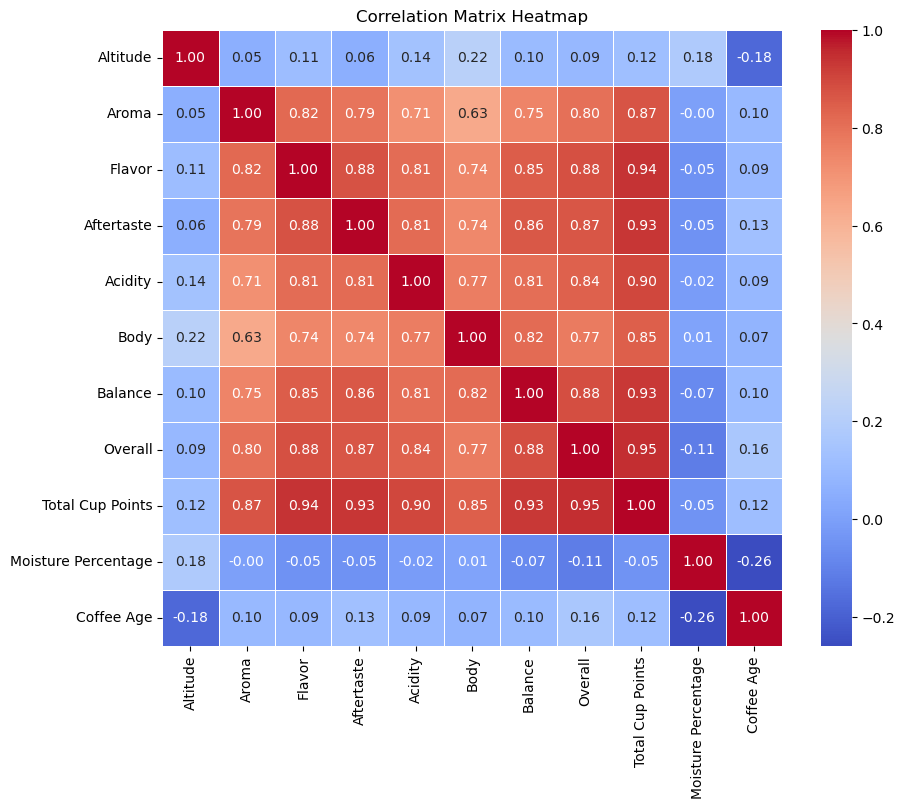

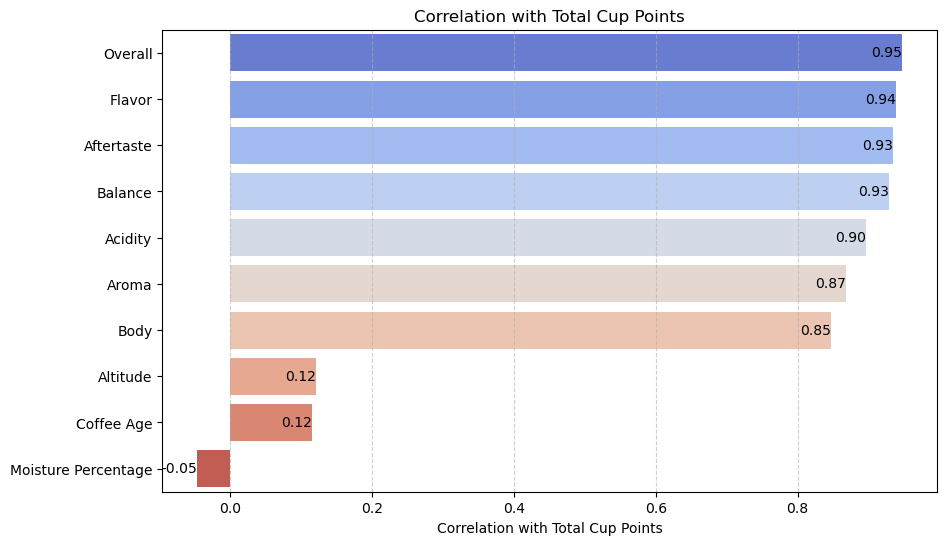

In [22]:
# Create a copy of the DataFrame
data = df.copy()

# Define the columns of interest
numerical_columns = ['Altitude', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall','Total Cup Points', 'Moisture Percentage', 'Coffee Age']

# Scale the numerical columns
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Compute the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Graph I: Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

# Get correlations with Total Cup Points
target_corr = correlation_matrix['Total Cup Points'].drop('Total Cup Points')

# Sort the correlations in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

# Graph II: Bar chart of correlations with Total Cup Points
plt.figure(figsize=(10, 6))
colors = sns.color_palette('coolwarm', len(target_corr_sorted))
sns.barplot(x=target_corr_sorted.values, y=target_corr_sorted.index, palette=colors)
plt.xlabel('Correlation with Total Cup Points')
plt.title('Correlation with Total Cup Points')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

# Annotate the bars with exact correlation values
for index, value in enumerate(target_corr_sorted):
    plt.text(value, index, f'{value:.2f}', va='center', ha='right', color='black', fontsize=10)

plt.show()

## Conclusion

Here are the top three and bottom three factors based on the correlation matrix analysis provided above:

***Top 3 Correlations***

- Overall: 0.95 – This represents the strongest positive correlation observed, indicating a significant positive association between the overall score and the total cup points.

- Flavor: 0.94 – This high positive correlation suggests that superior flavor evaluations are strongly linked to higher total cup points.

- Aftertaste and Balance: 0.93 – These attributes also exhibit a strong positive correlation, suggesting that enhanced aftertaste and balance scores are associated with increased total cup points.

Additionally, other attributes such as Acidity, Aroma, and Body also display relatively high positive correlations, with values of 0.90, 0.87, and 0.85, respectively.

***Bottom 3 Correlations***

- Moisture Percentage: -0.05 – This very weak negative correlation indicates a negligible impact of moisture percentage on total cup points. It also shows generally weak correlations with other attributes, with the most notable negative correlation being with Coffee Age (-0.26).

- Altitude: 0.12 – Exhibits a weak positive correlation, suggesting only a minor positive influence of altitude on total cup points.

- Coffee Age: 0.12 – Similarly, this weak positive correlation indicates a minor positive impact of coffee age on total cup points.

In summary, the analysis indicates that flavor qualities and overall scores have a robust positive correlation with total cup points. Conversely, factors such as altitude, coffee age, and moisture percentage exhibit very weak correlations with total cup points, which were unexpected outcomes.

# Clustering Analysis (Unsupervised)

We will now progress to the model training phase, adopting an unsupervised learning approach through clustering analysis. Given that our dataset comprises both numerical and categorical variables, preprocessing will be necessary. Specifically, label encoding will be applied to the categorical features, where each category is assigned a unique numerical label. After that, we will utilize t-SNE visualization, colored by Total Cup Points, for the extraction of insightful observations. Finally, we will use the elbow method in K-means clustering to confirm whether the optimal cluster size is two.

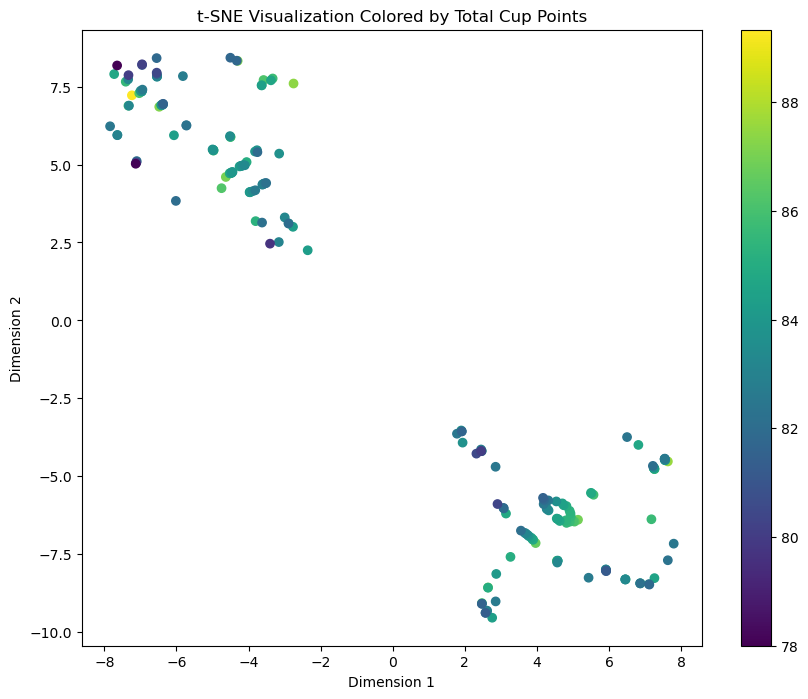

In [35]:
# Preprocessing
le = LabelEncoder()
mm = MinMaxScaler()
features_numerical = ['Altitude', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall', 'Moisture Percentage', 'Category One Defects', 'Quakers', 'Category Two Defects']
features_categorical = ['Country of Origin', 'Processing Method', 'Color']

for feature in features_categorical:
    df[feature] = le.fit_transform(df[feature])

df[features_numerical] = mm.fit_transform(df[features_numerical])

# t-SNE Visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=50, learning_rate=200)
tsne_results = tsne.fit_transform(df[features_numerical + features_categorical])

plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=df['Total Cup Points'], cmap='viridis')
plt.colorbar(scatter)
plt.title('t-SNE Visualization Colored by Total Cup Points')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


The t-SNE visualization above, colored by `Total Cup Points`, presents several clusters that show how coffee samples are grouped based on their characteristics:

- **Cluster Formation**: The data points are grouped into distinct clusters, which suggest that there are subgroups of coffee samples sharing similar traits. For instance, there are two primary clusters visible in the plot. Each cluster represents a different subset of data points with potentially different underlying properties.

- **Color Gradient and Coffee Quality**: The color gradient represents Total Cup Points, which indicate the quality of the coffee samples. This visualization shows a clear pattern where the color intensity varies within each cluster, suggesting that even within groups of similarly characterized coffees, there are variations in quality. For example, in the top-left cluster, the color varies from deep purple to lighter shades, indicating a range of quality scores from high to moderate within the same cluster.

- **Outliers and Consistency**: The absence of clear outliers in the plot suggests a relatively uniform distribution of characteristics among the coffee samples. All the samples fall within closely knit clusters with minimal deviation, indicating that the coffee samples are quite homogeneous in terms of the features considered in the t-SNE analysis.


Next, we will use the elbow method in K-means clustering to confirm whether the optimal cluster size is two.

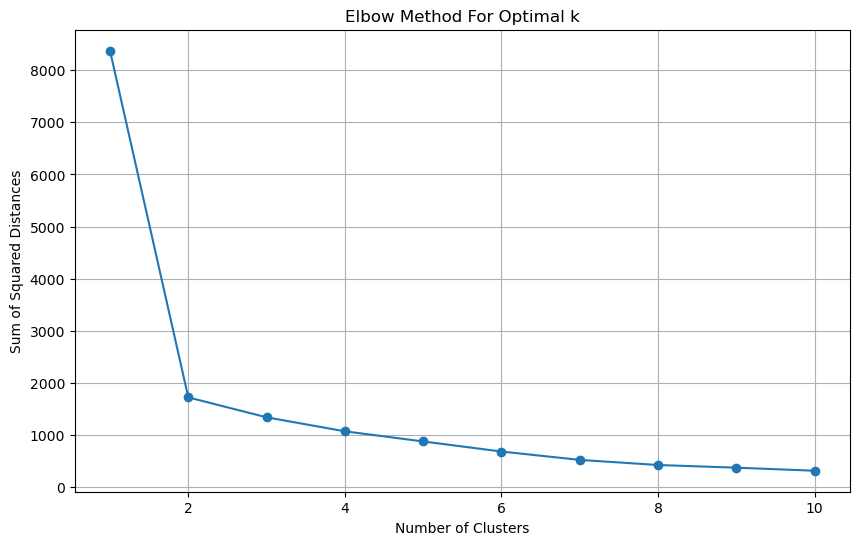

In [36]:
import warnings
warnings.filterwarnings('ignore')

# Prepare the dataset
data = df[features_numerical + features_categorical]  # Features
labels = df['Total Cup Points']  # Target variable if you're using supervised methods later


# Calculate SSD for a range of number of clusters
ssd = []
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(data)
    ssd.append(kmeans.inertia_)

# Plot SSDs for each number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), ssd, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.grid(True)
plt.show()

Indeed, the elbow method indicates that 2 is the optimal number of clusters for this dataset.

In [39]:
# Number of clusters
k = 2 

# Initialize the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model on the data
df['Cluster'] = kmeans.fit_predict(df[features_numerical + features_categorical])

# Check the count of data points in each cluster
print(df['Cluster'].value_counts())

Cluster
1    110
0     97
Name: count, dtype: int64


# Random Foreset Regressor (Supervised)

Among the various supervised learning algorithms available, the Random Forest regressor stands out as a robust and versatile method suitable for tackling complex regression tasks. This technique leverages the power of ensemble learning, where multiple decision trees are constructed during the training process, and their predictions are averaged to produce a more accurate and stable model.

In this section, we will use the `Random Forest Regressor` to build a predictive model for forecasting the `Total Cup Points`.

In [42]:
categorical_columns = ['Processing Method','Country of Origin', 'Color']
numerical_columns = ['Altitude', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall', 'Total Cup Points', 'Moisture Percentage', 'Category One Defects', 'Quakers', 'Category Two Defects', 'Coffee Age']

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), [col for col in numerical_columns if col != 'Total Cup Points']),
        ('cat', OneHotEncoder(), categorical_columns)])

# Append classifier to preprocessing pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestRegressor(n_estimators=100, random_state=42))])

# Split the data into train and test sets
X = df.drop('Total Cup Points', axis=1)
y = df['Total Cup Points']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

# Fit the model to the training data
clf.fit(X_train, y_train)

# Predict on the training data and the test data
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

# Evaluate the model performance
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

print(f"Training RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Training R2 Score: {train_r2:.2f}")
print(f"Test R2 Score: {test_r2:.2f}")

Training RMSE: 0.13
Test RMSE: 0.36
Training R2 Score: 0.99
Test R2 Score: 0.95


Our model performs quite well, as evidenced by the high R2 score on the test dataset. Next, we'd like to examine the feature importance, as this could provide insights into which factors are most important for the `Total Cup Points`.

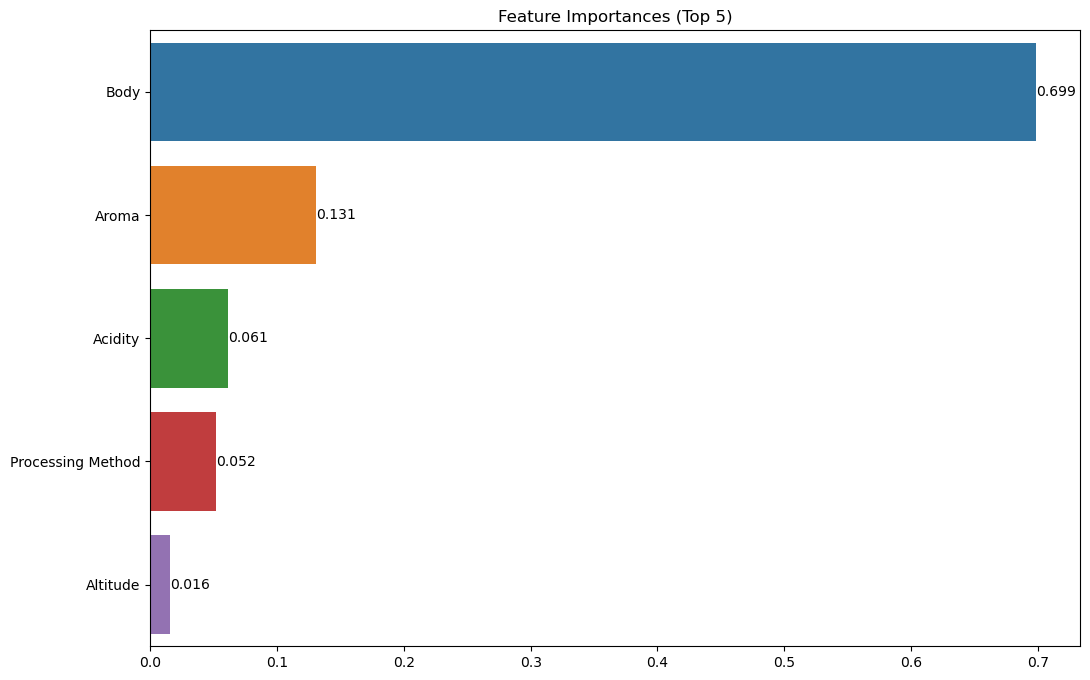

In [55]:
# Feature importance
feature_names = X_train.columns.tolist()
for cat in clf.named_steps['preprocessor'].transformers_[1][1].categories_:
    feature_names.extend(cat.tolist())
importances = clf.named_steps['classifier'].feature_importances_
sorted_indices = np.argsort(importances)[::-1]

# Feature Importance Plot
plt.figure(figsize=(12, 8))
sorted_indices = np.argsort(importances)[::-1][:5]
plt.title('Feature Importances (Top 5)')
bars = sns.barplot(y=np.array(feature_names)[sorted_indices], x=importances[sorted_indices])
for bar in bars.patches:
    plt.text(bar.get_width(),  # x-coordinate position for text
             bar.get_y() + bar.get_height() / 2,  # y-coordinate position for text
             f'{bar.get_width():.3f}',  # text to display
             va='center')  # vertical alignment
plt.show()


Here are some observations about the result:

**Body (0.699)**: This attribute has the highest importance score, suggesting that the thickness or viscosity of the coffee in the mouth (its body) is the most critical factor in determining the overall quality of coffee as measured by 'Total Cup Points'. This could imply that the sensory perception of the coffee's texture is a significant determinant of its perceived quality.

**Aroma (0.131)**: The second most influential factor is the aroma, which accounts for about 13.1% of the importance in the model. This indicates that the scent or fragrance of the coffee also plays a substantial role in its quality assessment. The aroma is often the first characteristic experienced by consumers and can heavily influence their overall impression.

**Acidity (0.061)**: Acidity, which refers to the brightness or tartness of the coffee, is the third most important feature. It contributes to the lively and sharp taste that can enhance the coffee's flavor profile. While less critical than body and aroma, its importance shows that the taste profile, particularly how vivid or muted the coffee feels, is a notable factor in quality ratings.

**Processing Method** and **Altitude**, contributing 5.2% and 1.6% respectively, have lesser influence on the model compared to other factors. The Processing Method affects the coffee beans' attributes post-harvest, impacting the overall sensory qualities of the coffee. Although Altitude plays a role in shaping flavor complexity and acidity, its impact is relatively minor within this dataset. Together, these factors suggest that while certain cultivation and processing techniques do affect coffee quality, their influence is less pronounced than sensory properties like body and aroma.

Overall, these importances highlight that both physical properties (like body and aroma) and some aspects of cultivation and processing (like acidity and method) significantly determine coffee quality as perceived through `Total Cup Points`. This insight can guide both coffee producers and marketers in focusing on these key attributes to enhance product quality and consumer satisfaction.

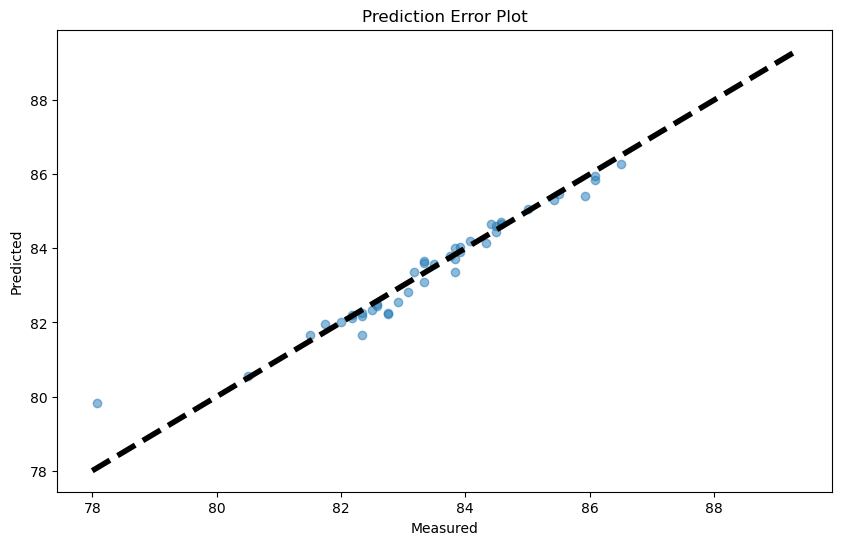

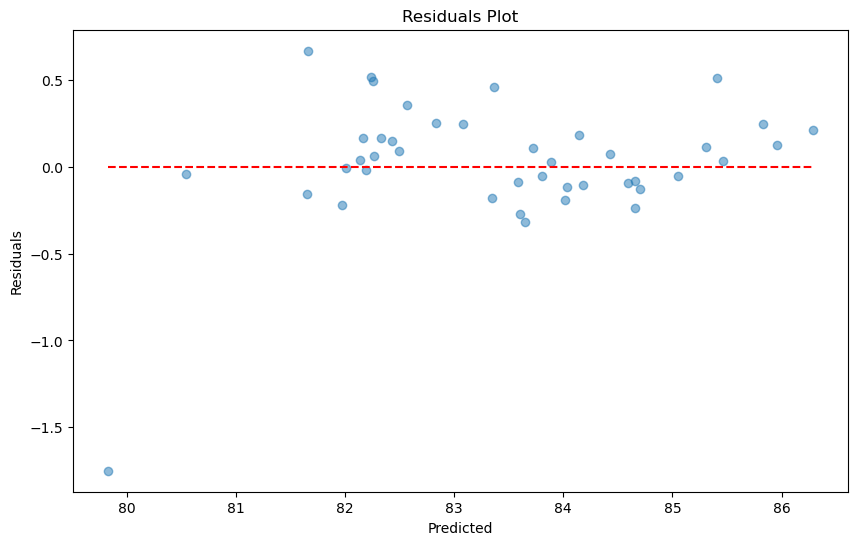

In [51]:
# Prediction Error Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  # Diagonal line for reference
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Prediction Error Plot')
plt.show()

# Residuals Plot
residuals = y_test - test_predictions
plt.figure(figsize=(10, 6))
plt.scatter(test_predictions, residuals, alpha=0.5)
plt.hlines(y=0, xmin=test_predictions.min(), xmax=test_predictions.max(), colors='red', linestyles='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

Here are some observations about the result:

**Prediction Error Plot**: This plot compares the actual `Total Cup Points` (Measured) against the predicted values (Predicted). The points are generally aligned closely with the dashed diagonal line, which indicates that the predictions closely match the actual values across the range. This alignment suggests that the model has a strong predictive accuracy, with most predictions falling within a close range of the actual scores.

**Residuals Plot**: This plot shows the residuals (the differences between the actual and predicted values) versus the predicted values. Ideally, residuals should be randomly distributed around the horizontal line at zero, indicating that the model does not systematically overestimate or underestimate the scores. In this plot, while most residuals cluster around zero, indicating good model performance, there is a slight spread, suggesting some variance in the accuracy of predictions across different values. The presence of one notable outlier suggests an instance where the model significantly underestimated the score, which might warrant further investigation.

Together, these plots demonstrate that the model performs well with high accuracy and reliability, though there might be room for improvement, especially in handling outliers or certain ranges where the residuals are higher.